## Зачетная работа по предмету “Системы компьютерной математики”

### Тема 32. Нахождение корня нелинейного уравнения с помощью метода обратной квадратичной интерполяции

#### Выполнил Денисов Артём Андреевич

Реализовать метод обратной квадратичной интерполяции для нахождения корня нелинейного уравнения.<br>
Привести примеры уравнений, для которых процесс а) сходится сверхлинейно; б) сходится с линейной скоростью; в) не сходится.<br>
Ваша программа должна строить графики этих функций, выдавать найденный корень и количество вычислений значений функции.<br>

## Теоритическая часть

Метод обратной квадратичной интерполяции оределяется рекуррентным соотношением<br>
$x_{n+1} = \frac{f_{n-1}f_n}{(f_{n-2} - f_{n-1})(f_{n-2} - f_n)}x_{n-2} + \frac{f_{n-2}f_n}{(f_{n-1} - f_{n-2})(f_{n-1} - f_n)}x_{n-1} + \frac{f_{n-2}f_{n-1}}{(f_n - f_{n-2})(f_n - f_{n-1})}x_n$<br>
Где $f_k = f(x_k)$<br>


Для этого метода требуются три начальных значения: $x_0$, $x_1$, $x_2$

## Реализация

Подключение нужных библиотек:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Реализация метода обратной квадратичной интерполяции

In [2]:
def IQI(x0, x1, x2, f):
    def f0(x0, x1, x2):
        return (f(x1) * f(x2) * x0) / ((f(x0) - f(x1)) * (f(x0) - f(x2)))
    def f1(x0, x1, x2):
        return (f(x0) * f(x2) * x1) / ((f(x1) - f(x0)) * (f(x1) - f(x2)))
    def f2(x0, x1, x2):
        return (f(x0) * f(x1) * x2) / ((f(x2) - f(x0)) * (f(x2) - f(x1)))
    xxx = [x0, x1, x2]
    i = 2
    while f(xxx[i]) != 0 and f(xxx[i]) != f(xxx[i - 1]) and f(xxx[i - 1]) != f(xxx[i - 2]) and f(xxx[i - 2]) != f(xxx[i]) and i < 100000:
        xxx.append(f0(xxx[i - 2], xxx[i - 1], xxx[i]) + f1(xxx[i - 2], xxx[i - 1], xxx[i]) + f2(xxx[i - 2], xxx[i - 1], xxx[i]))
        i += 1
    if f(xxx[i]) != 0:
        convergence = 0
    else:
        superlinear = True
        lastg = 1000000
        for j in range(3, i):
            g = abs(xxx[j] - xxx[i]) / abs(xxx[j - 1] - xxx[i])
            if lastg < g: lastg = g
            else:
                superlinear = False
                break
        if superlinear: convergence = 2
        else: convergence = 1
    if (convergence != 0): return xxx[-1], i, convergence
    else: return None, i, convergence

Уравнение для которого процесс сходится линейно<br>
$x^2 = 0$

In [3]:
def f0(x):
    return x ** 2

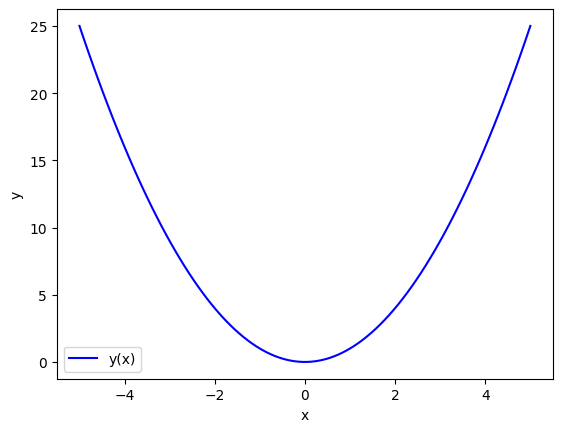

The root of the equation: 0.0
Number of calculations: 277


In [4]:
x = np.linspace(-5, 5, 100)
y = f0(x)

fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="y(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()
root, count, convegence = IQI(6, 5, 4, f0)
print("The root of the equation: " + str(root))
print("Number of calculations: " + str(count))

Уравнение для которого процесс не сходится<br>
$x^5 + x^3 - 7 = 0$

In [5]:

def f1(x):
    return x ** 5 + x ** 3 - 7

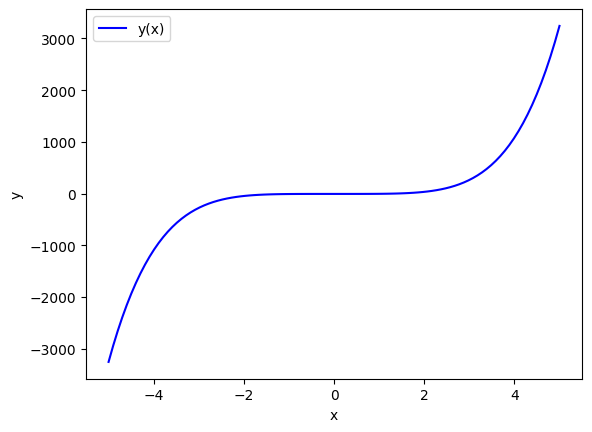

The root of the equation: None
Number of calculations: 16


In [6]:
x = np.linspace(-5, 5, 100)
y = f1(x)

fig, ax = plt.subplots()
ax.plot(x, y, color="blue", label="y(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.show()
root, count, convegence = IQI(4, 5, 6, f1)
print("The root of the equation: " + str(root))
print("Number of calculations: " + str(count))

Уравнение для которого процесс сходится сверхлинейно<br>
Я не смог найти такого уравнения